In [347]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [348]:
%matplotlib inline

In [350]:
metal = cv.imread('./material_TPs/TP2/metalgrid.jpg', cv.IMREAD_GRAYSCALE)
metal.shape

(350, 735)

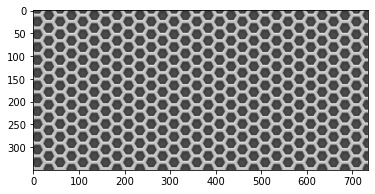

In [351]:
plt.imshow(metal, cmap='gray', vmin=0, vmax=255)
plt.show()

In [352]:
#suavizado gaussiano
blur = cv.GaussianBlur(metal,(5,5),0)

In [353]:
#gradientes
# X
sobelx_64 = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

In [354]:
#Y
sobely_64 = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

In [355]:
#magnitud

mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

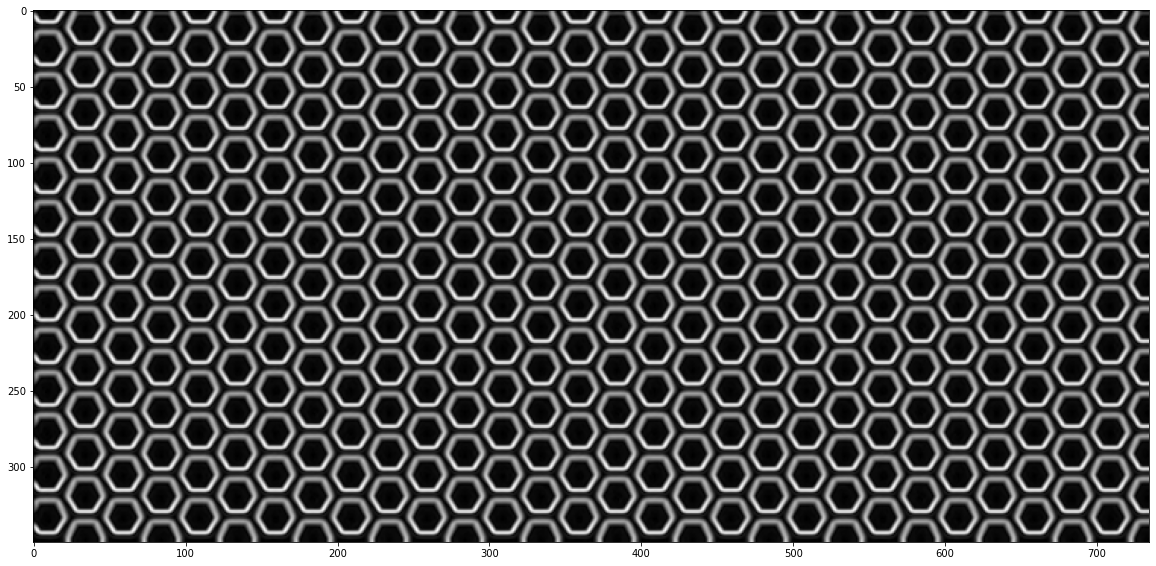

In [356]:
plt.figure(figsize = (20,20))
plt.imshow(mag, cmap='gray', vmin=0, vmax=255)
plt.show()

In [357]:
#angulo
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)
angle.shape

(350, 735)

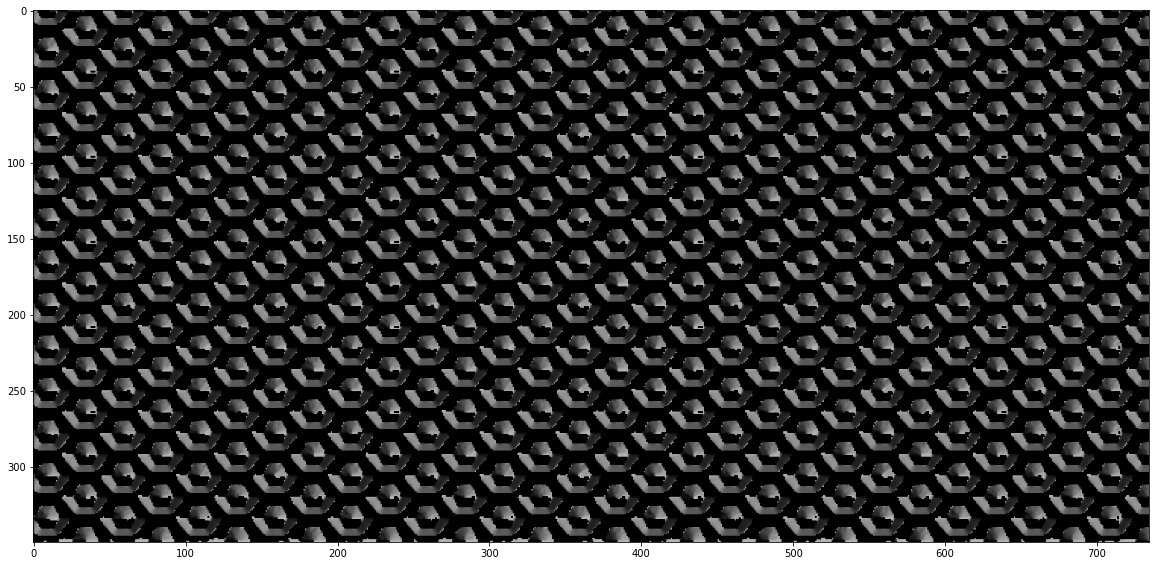

In [358]:
plt.figure(figsize = (20,20))
plt.imshow(angle, cmap='gray', vmin=0, vmax=255)
plt.show()

In [490]:
metal_rgb =cv.imread('./material_TPs/TP2/metalgrid.jpg')
metal_RGB = cv.cvtColor(metal_rgb, cv.COLOR_BGR2RGB)

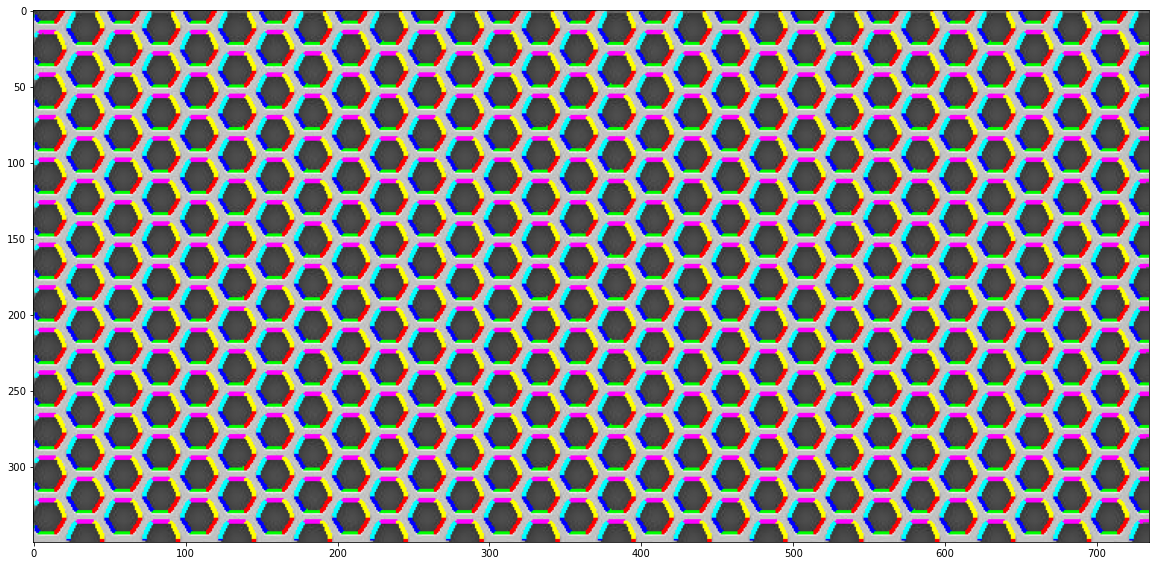

In [495]:
metal_RGB[np.logical_and((mag >= 120), np.logical_and(angle >= 120 , angle < 180))] = [0,0,255]
metal_RGB[np.logical_and((mag >= 120), np.logical_and(angle >= 80 , angle < 120))] = [0,255,0]
metal_RGB[np.logical_and((mag >= 120), np.logical_and(angle >= 0 , angle < 80))] = [255,0,0]
metal_RGB[np.logical_and((mag >= 120), np.logical_and(angle >= -80 , angle < 0))] = [255,255,0]
metal_RGB[np.logical_and((mag >= 120), np.logical_and(angle >= -120 , angle < -80))] = [255,0,255]
metal_RGB[np.logical_and((mag >= 120), np.logical_and(angle >= -180 , angle < -120))] = [0,255,255]

plt.figure(figsize = (20,20))
plt.imshow(metal_RGB, cmap='gray', vmin=0, vmax=255)
plt.show()